# ZSC Comparsion of Different Encoders

In [1]:
import sys
import os
sys.path.append('.')
from baselines.datasets import representations_from_df, labels_from_df 
from baselines.io import load_baseline_model

data_folder = "BIOSCAN_5M_DNA_experiments/data"
 
#"BarcodeBERT_soft_penalty/data"

for model_name in ["BarcodeBERT", "DNABERT-2", "DNABERT-S", "NT", "Hyena_DNA"]:
    if model_name == "BarcodeBERT":
        checkpoints = {"BarcodeBERT-5M":"/h/pmillana/projects/BIOSCAN_5M_DNA_experiments/model_checkpoints/8_4_4/checkpoint_pretraining.pt",
                       #"BarcodeBERT-1.5M":"/scratch/ssd004/scratch/pmillana/checkpoints/canada-1.5M/k4-4-4_w1.0_m1.0_r0.0.pt",
                      }
        
        for ckpt_name in checkpoints:
            checkpoint = checkpoints[ckpt_name]
            embedder = load_baseline_model(model_name, checkpoint_path=checkpoint, new_vocab=False)

            print(ckpt_name)

            embedder.name = model_name
            
            # Ensure model is in eval mode
            embedder.model.eval()
        
            trainable_params = sum(	p.numel() for p in embedder.model.parameters() if p.requires_grad)
        
            print(f"Number of trainable parameters: {trainable_params}")
            
            for file in ["unseen", "supervised_test"]: 
                filename = f"/h/pmillana/projects/{data_folder}/{file}.csv"
                embeddings = representations_from_df(filename, embedder, dataset="BIOSCAN-5M", target="processid") #dataset= "BIOSCAN-5M"
                print(embeddings.shape)

            #os.rename(f"/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/BarcodeBERT", 
            #          f"/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/{ckpt_name}")
            
    else:
        embedder = load_baseline_model(model_name)
    
        embedder.name = model_name
        
        # Ensure model is in eval mode
        embedder.model.eval()
    
        trainable_params = sum(	p.numel() for p in embedder.model.parameters() if p.requires_grad)
    
        print(f"Number of trainable parameters: {trainable_params}")
        
        for file in ["unseen", "supervised_test"]: 
            filename = f"/h/pmillana/projects/{data_folder}/{file}.csv"
            embeddings = representations_from_df(filename, embedder, dataset="BIOSCAN-5M", target="processid") #dataset= "BIOSCAN-5M"
            print(embeddings.shape)

Using device: cuda

Loading model from /h/pmillana/projects/BIOSCAN_5M_DNA_experiments/model_checkpoints/8_4_4/checkpoint_pretraining.pt

Loading model from /h/pmillana/projects/BIOSCAN_5M_DNA_experiments/model_checkpoints/8_4_4/checkpoint_pretraining.pt
Loaded model from /h/pmillana/projects/BIOSCAN_5M_DNA_experiments/model_checkpoints/8_4_4/checkpoint_pretraining.pt
BarcodeBERT-5M
Number of trainable parameters: 129478144
Using device: cuda
Calculating embeddings for BarcodeBERT
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/BarcodeBERT/unseen.pickle


0it [00:00, ?it/s]

(3396, 768)
Using device: cuda
Calculating embeddings for BarcodeBERT
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/BarcodeBERT/supervised_test.pickle


0it [00:00, ?it/s]

(18348, 768)


/h/pmillana/miniconda3/envs/hyenadna/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/fs01/home/pmillana/projects/BarcodeBERT/baselines/models/dnabert2.py:203: UserWarning: Unable to import Triton; defaulting MosaicBERT attention                 implementation to pytorch (this will reduce throughput when using this model).
  self.self = BertUnpadSelfAttention(config)


Number of trainable parameters: 117068544
Using device: cuda
Calculating embeddings for DNABERT-2
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/DNABERT-2/unseen.pickle


0it [00:00, ?it/s]

(3396, 768)
Using device: cuda
Calculating embeddings for DNABERT-2
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/DNABERT-2/supervised_test.pickle


0it [00:00, ?it/s]

(18348, 768)


/h/pmillana/miniconda3/envs/hyenadna/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/fs01/home/pmillana/projects/BarcodeBERT/baselines/models/dnabert2.py:203: UserWarning: Unable to import Triton; defaulting MosaicBERT attention                 implementation to pytorch (this will reduce throughput when using this model).
  self.self = BertUnpadSelfAttention(config)


Number of trainable parameters: 117068544
Using device: cuda
Calculating embeddings for DNABERT-S
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/DNABERT-S/unseen.pickle


0it [00:00, ?it/s]

(3396, 768)
Using device: cuda
Calculating embeddings for DNABERT-S
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/DNABERT-S/supervised_test.pickle


0it [00:00, ?it/s]

(18348, 768)


/h/pmillana/miniconda3/envs/hyenadna/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Number of trainable parameters: 55904972
Using device: cuda
Calculating embeddings for NT
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/NT/unseen.pickle


0it [00:00, ?it/s]

(3396, 512)
Using device: cuda
Calculating embeddings for NT
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/NT/supervised_test.pickle


0it [00:00, ?it/s]

(18348, 512)
Loaded pretrained weights ok!
Number of trainable parameters: 436096
Using device: cuda
Calculating embeddings for Hyena_DNA
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/Hyena_DNA/unseen.pickle


0it [00:00, ?it/s]

(3396, 128)
Using device: cuda
Calculating embeddings for Hyena_DNA
/scratch/ssd004/scratch/pmillana/embeddings/embeddings/BIOSCAN-5M/Hyena_DNA/supervised_test.pickle


0it [00:00, ?it/s]

(18348, 128)


### This notebook Compares the embedding performance on the 'BIOSCAN-5M' dataset, of seven different DNA barcode-based models: BarcodeBERT-1M, BarcodeBERT-5M, DNABERT, DNABERT-2, DNABERT-S, Hyena_DNA and NT.

In [1]:
%matplotlib inline
import os
import pickle
import cProfile
import pstats
import warnings

import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy.spatial import distance
from matplotlib import pyplot as plt
from obj_knn import FinBOL_GBOL
from tqdm import tqdm

warnings.filterwarnings("ignore")

dataset = "BIOSCAN-5M"
data_folder = "BIOSCAN_5M_DNA_experiments/data"

### Each sample is labeled at seven taxonomic ranks: class, order, family, subfamily, tribe, genus, and species. 

In [2]:
rank_list = ["class", "order", "family", "genus", "species", "dna_bin"]
#rank_list = ["dna_bin"]
#rank_list = ["species"]
encoders = ["BarcodeBERT", "DNABERT-2", "DNABERT-S", "Hyena_DNA", "NT"] #, "DNABERT"]

# Creating the embeddings dictionary to hold all the FinBOL vs GBOL embedding/label data 
embeddings = {}
for encoder in encoders:
    embeddings[encoder] = {}

### We load embeddings from the test and the unseen_test partitions

In [3]:
for encoder in encoders:
    # reading the Seen embeddings
    embeddings_folder = f"/scratch/ssd004/scratch/pmillana/embeddings/embeddings/{dataset}"
    with open(f"{embeddings_folder}/{encoder}/supervised_test.pickle", "rb") as train_handle:
        embeddings[encoder]["Seen"] = pickle.load(train_handle)

    # reading the Unseen embeddings
    with open(f"{embeddings_folder}/{encoder}/unseen.pickle", "rb") as test_handle:
        embeddings[encoder]["Unseen"] = pickle.load(test_handle)

print('Partition lengths:')
print("Train: ", len(embeddings[encoder]["Seen"]['ids']))
print("Test: ", len(embeddings[encoder]["Unseen"]['ids']))


Partition lengths:
Train:  18348
Test:  3396


In [4]:
for encoder in encoders:
    print(encoder)
    for x in (embeddings["BarcodeBERT"]["Unseen"]['ids'][0:3]):
        print(x)
    print('')


BarcodeBERT
CRPEB17249-21
CRPEA1108-21
CRPEB5181-21

DNABERT-2
CRPEB17249-21
CRPEA1108-21
CRPEB5181-21

DNABERT-S
CRPEB17249-21
CRPEA1108-21
CRPEB5181-21

Hyena_DNA
CRPEB17249-21
CRPEA1108-21
CRPEB5181-21

NT
CRPEB17249-21
CRPEA1108-21
CRPEB5181-21



### Each model encodes a different represenation of the data it was given. To see this, and check that all the data from each model was downloaded properly, a small slice of each encoder's first three embeddings is shown below.

In [5]:
# checking embeddings have been loaded correctly for each model
for encoder in encoders:
    print(encoder)
    for x in (embeddings[encoder]["Seen"]['data'][0:3]):
        print(x[0:5])
    print('')

BarcodeBERT
[ 1.5062281   0.11249051 -2.0537694   1.9765141   1.5314695 ]
[ 0.7921284 -2.5171895 -3.8775194 -2.3774455  2.2981136]
[ 5.7731423   0.34086713 -1.7057253   2.957172    3.554723  ]

DNABERT-2
[ 0.17858201  0.08942708  0.23697732 -0.26345098  0.04076565]
[ 0.15763062  0.18661389  0.15018569 -0.19605121 -0.03293299]
[ 0.02982889  0.07215738  0.07854527 -0.14966437 -0.06192144]

DNABERT-S
[-0.25617623 -0.1465276   0.24118118 -0.00242627  0.03149094]
[-0.29939628 -0.16712841  0.17250028 -0.07193616  0.02710117]
[-0.13848373 -0.13168788  0.19190922 -0.0146302  -0.02330366]

Hyena_DNA
[-0.7476919   0.26012772 -0.70170504  5.2136874   0.4098886 ]
[-0.71293354  0.28801727 -0.6312521   5.1132965   0.3321803 ]
[-0.77050817  0.22987808 -0.7572007   5.071715    0.4081281 ]

NT
[ 0.00393373  0.44256657  0.3449037  -0.0759653   0.5137679 ]
[-0.02169942  0.5307318   0.3319087  -0.11005886  0.5406885 ]
[ 0.01421634  0.40398404  0.32282448 -0.06408546  0.49107185]



### After reading the embedding files from each model, the labels associated with each embeddings must be further processed in order to be used in the ZSC. A single sample from the file contains a 'data' segment (the embedding), and a 'ids' segments which contains a label that holds several different kinds of information about that specific sample. It is this 'ids' segment that must be seperated into several more specific segments including the label of that sample at each of the seven taxonomic ranks listed above.

In [6]:
import pandas as pd

train = pd.read_csv(f"/h/pmillana/projects/{data_folder}/supervised_test.csv")
test = pd.read_csv(f"/h/pmillana/projects/{data_folder}/unseen.csv")

df_dict = {'Seen': train, 'Unseen':test}

for encoder in encoders:
    for part in ('Seen', 'Unseen'):
        df = df_dict[part]
        for rank in rank_list:
            if rank not in ['class', 'dna_bin']:
                taxa = rank + '_name'
            else:
                taxa = rank
            processid_to_taxa = dict(zip(df['processid'], df[taxa]))
            # extract label at each taxonomic rank
            embeddings[encoder][part][rank] = [processid_to_taxa.get(processid, None) for processid in embeddings[encoder][part]['ids']]

### After processing the initial label, each sample now has 10 distinct labels that can be used to group and identify them. Below is an example of the labels concerning the first sample of the FinBOL dataset

In [7]:
# displaying all the new labels
for x in embeddings['NT']['Seen'].keys():
    if x != 'data':
        print(f"{x}:{' '*(10-len(x))}" ,embeddings['Hyena_DNA']['Seen'][x][13])

ids:        CRPEB17386-21
class:      Malacostraca
order:      Amphipoda
family:     Brevitalitridae
genus:      Talitroides
species:    Talitroides topitotum
dna_bin:    BOLD:AAV0705


In [8]:
df_dict['Seen'][df_dict['Seen']["processid"]=="CRPEB17386-21"]

,processid,phylum,class,order_name,family_name,subfamily_name,genus_name,species_name,dna_bin,nucleotides,split,phylum_index,class_index,order_index,family_index,subfamily_index,genus_index,species_index,dna_bin_index
13,CRPEB17386-21,Arthropoda,Malacostraca,Amphipoda,Brevitalitridae,unassigned Brevitalitridae,Talitroides,Talitroides topitotum,BOLD:AAV0705,TTATACTTCATTTTAGGTGCTTGGGCTAGAGTTATTGGTACCTCTT...,test,0,4,0,35,250,520,503,460


### A single dictionary called 'embeddings' now holds all the data and labels associated with each sample, for each partition, for each model. This example shows the general tree structure for how the data is accessed for each model where each key holds another dictionary except for those at the lowest level which are lists.

In [10]:
print(embeddings.keys())
print(embeddings['NT'].keys())
print(embeddings['NT']['Unseen'].keys())

dict_keys(['BarcodeBERT', 'DNABERT-2', 'DNABERT-S', 'Hyena_DNA', 'NT'])
dict_keys(['Seen', 'Unseen'])
dict_keys(['data', 'ids', 'class', 'order', 'family', 'genus', 'species', 'dna_bin'])


# ZSC Analysis
the results following the section as well as the associated output files for each model have been made using k=10 for the KNN analysis

In [9]:
import umap
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score

def zsc_pipeline(X, y_true):
        
    # Step 1: Dimensionality reduction with UMAP to 50 dimensions
    umap_reducer = umap.UMAP(n_components=50, random_state=42)
    X_reduced = umap_reducer.fit_transform(X)
    
    # Step 2: Cluster the reduced embeddings with Agglomerative Clustering (L2, Ward’s method)
    agglomerative_clustering = AgglomerativeClustering(n_clusters=4363, linkage='ward')
    cluster_labels = agglomerative_clustering.fit_predict(X_reduced)
    
    # Step 3: Evaluate clustering performance with Adjusted Mutual Information (AMI) score
    ami_score = adjusted_mutual_info_score(y_true, cluster_labels)
    
    print("Adjusted Mutual Information (AMI) score:", ami_score) 
    return ami_score

In [17]:
# dictionaries for storing results and knn probability data
results = {}
label_probs = {}

for encoder in encoders:
    results[encoder] = {}

    # using tqdm to display progress bar for each model
    for i in tqdm(range(len(rank_list)),desc=f"{encoder}{' '*(15-len(encoder))}"):
        rank=rank_list[i]
        results[encoder][rank] = {}

        # creating a number mapping for the labels at the current taxonomic rank to use for the analysis
        #all_labels = sorted(list(set(embeddings[encoder]['Unseen'][rank]+embeddings[encoder]['Seen'][rank])))
        #embeddings[encoder]['Seen']['mapped_y_true'] = np.array([all_labels.index(el) for el in embeddings[encoder]['Seen'][rank]])
        #embeddings[encoder]['Unseen']['mapped_y_true'] = np.array([all_labels.index(el) for el in embeddings[encoder]['Unseen'][rank]])
        
        partition_name = "test_seen + unseen"
        X_part = np.vstack([embeddings[encoder]['Seen']['data'], embeddings[encoder]['Unseen']['data']])
        y_part = np.hstack([embeddings[encoder]['Seen'][rank], embeddings[encoder]['Unseen'][rank]])

        print(X_part.shape, y_part.shape)
            
        # ZSC-accuracy
        res_part = {}
        res_part["count"] = len(y_part)
        # Note that these evaluation metrics have all been converted to percentages
        res_part["AMI"] = 100.0 * zsc_pipeline(X_part, y_part)
        results[encoder][rank][partition_name] = res_part
        print(res_part["AMI"])
            

BarcodeBERT    :   0%|          | 0/6 [00:00<?, ?it/s]

(21744, 768) (21744,)


BarcodeBERT    :  17%|█▋        | 1/6 [02:21<11:47, 141.53s/it]

Adjusted Mutual Information (AMI) score: 0.03915220553646666
3.915220553646666
(21744, 768) (21744,)


BarcodeBERT    :  33%|███▎      | 2/6 [04:36<09:11, 137.95s/it]

Adjusted Mutual Information (AMI) score: 0.24048359151633972
24.04835915163397
(21744, 768) (21744,)


BarcodeBERT    :  50%|█████     | 3/6 [06:44<06:39, 133.03s/it]

Adjusted Mutual Information (AMI) score: 0.4209563032853098
42.09563032853098
(21744, 768) (21744,)


BarcodeBERT    :  67%|██████▋   | 4/6 [08:59<04:27, 133.86s/it]

Adjusted Mutual Information (AMI) score: 0.44669798063630034
44.66979806363003
(21744, 768) (21744,)


BarcodeBERT    :  83%|████████▎ | 5/6 [11:19<02:16, 136.11s/it]

Adjusted Mutual Information (AMI) score: 0.41715939433933813
41.71593943393381
(21744, 768) (21744,)


BarcodeBERT    : 100%|██████████| 6/6 [13:37<00:00, 136.33s/it]


Adjusted Mutual Information (AMI) score: 0.407918866527778
40.7918866527778


DNABERT-2      :   0%|          | 0/6 [00:00<?, ?it/s]

(21744, 768) (21744,)


DNABERT-2      :  17%|█▋        | 1/6 [01:57<09:47, 117.59s/it]

Adjusted Mutual Information (AMI) score: 0.03445484647866791
3.445484647866791
(21744, 768) (21744,)


DNABERT-2      :  33%|███▎      | 2/6 [03:54<07:49, 117.27s/it]

Adjusted Mutual Information (AMI) score: 0.2093801056607426
20.93801056607426
(21744, 768) (21744,)


DNABERT-2      :  50%|█████     | 3/6 [05:48<05:47, 115.76s/it]

Adjusted Mutual Information (AMI) score: 0.3749974042835214
37.49974042835214
(21744, 768) (21744,)


DNABERT-2      :  67%|██████▋   | 4/6 [07:49<03:55, 117.74s/it]

Adjusted Mutual Information (AMI) score: 0.5182021823516753
51.82021823516752
(21744, 768) (21744,)


DNABERT-2      :  83%|████████▎ | 5/6 [09:53<02:00, 120.20s/it]

Adjusted Mutual Information (AMI) score: 0.7069658594497753
70.69658594497753
(21744, 768) (21744,)


DNABERT-2      : 100%|██████████| 6/6 [11:59<00:00, 119.93s/it]


Adjusted Mutual Information (AMI) score: 0.720667858340197
72.0667858340197


DNABERT-S      :   0%|          | 0/6 [00:00<?, ?it/s]

(21744, 768) (21744,)


DNABERT-S      :  17%|█▋        | 1/6 [01:47<08:59, 107.96s/it]

Adjusted Mutual Information (AMI) score: 0.038342998169320644
3.8342998169320643
(21744, 768) (21744,)


DNABERT-S      :  33%|███▎      | 2/6 [03:37<07:15, 108.90s/it]

Adjusted Mutual Information (AMI) score: 0.23760993565283234
23.760993565283233
(21744, 768) (21744,)


DNABERT-S      :  50%|█████     | 3/6 [05:28<05:28, 109.63s/it]

Adjusted Mutual Information (AMI) score: 0.4498426634041478
44.98426634041478
(21744, 768) (21744,)


DNABERT-S      :  67%|██████▋   | 4/6 [07:21<03:42, 111.17s/it]

Adjusted Mutual Information (AMI) score: 0.6426738298574334
64.26738298574334
(21744, 768) (21744,)


DNABERT-S      :  83%|████████▎ | 5/6 [09:21<01:54, 114.39s/it]

Adjusted Mutual Information (AMI) score: 0.8752294410216125
87.52294410216125
(21744, 768) (21744,)


DNABERT-S      : 100%|██████████| 6/6 [11:21<00:00, 113.64s/it]


Adjusted Mutual Information (AMI) score: 0.8781956672414593
87.81956672414593


Hyena_DNA      :   0%|          | 0/6 [00:00<?, ?it/s]

(21744, 128) (21744,)


Hyena_DNA      :  17%|█▋        | 1/6 [01:49<09:06, 109.21s/it]

Adjusted Mutual Information (AMI) score: 0.03824004637809252
3.824004637809252
(21744, 128) (21744,)


Hyena_DNA      :  33%|███▎      | 2/6 [03:39<07:19, 109.90s/it]

Adjusted Mutual Information (AMI) score: 0.23670511876437036
23.670511876437036
(21744, 128) (21744,)


Hyena_DNA      :  50%|█████     | 3/6 [05:39<05:43, 114.58s/it]

Adjusted Mutual Information (AMI) score: 0.44357695908257594
44.3576959082576
(21744, 128) (21744,)


Hyena_DNA      :  67%|██████▋   | 4/6 [07:41<03:55, 117.56s/it]

Adjusted Mutual Information (AMI) score: 0.6152167186894153
61.52167186894153
(21744, 128) (21744,)


Hyena_DNA      :  83%|████████▎ | 5/6 [09:49<02:01, 121.11s/it]

Adjusted Mutual Information (AMI) score: 0.8295942717746272
82.95942717746271
(21744, 128) (21744,)


Hyena_DNA      : 100%|██████████| 6/6 [11:54<00:00, 119.09s/it]


Adjusted Mutual Information (AMI) score: 0.8272978534719115
82.72978534719115


NT             :   0%|          | 0/6 [00:00<?, ?it/s]

(21744, 512) (21744,)


NT             :  17%|█▋        | 1/6 [01:52<09:23, 112.80s/it]

Adjusted Mutual Information (AMI) score: 0.03242083550512588
3.242083550512588
(21744, 512) (21744,)


NT             :  33%|███▎      | 2/6 [03:48<07:37, 114.38s/it]

Adjusted Mutual Information (AMI) score: 0.20215701285222853
20.215701285222853
(21744, 512) (21744,)


NT             :  50%|█████     | 3/6 [05:42<05:42, 114.26s/it]

Adjusted Mutual Information (AMI) score: 0.2927995406685904
29.279954066859037
(21744, 512) (21744,)


NT             :  67%|██████▋   | 4/6 [07:37<03:48, 114.44s/it]

Adjusted Mutual Information (AMI) score: 0.30504459710074483
30.50445971007448
(21744, 512) (21744,)


NT             :  83%|████████▎ | 5/6 [09:36<01:56, 116.39s/it]

Adjusted Mutual Information (AMI) score: 0.3394431147950396
33.94431147950396
(21744, 512) (21744,)


NT             : 100%|██████████| 6/6 [11:36<00:00, 116.05s/it]

Adjusted Mutual Information (AMI) score: 0.33763587170554504
33.7635871705545


In [18]:
print(results)

{'BarcodeBERT': {'class': {'test_seen + unseen': {'count': 21744, 'AMI': 3.915220553646666}}, 'order': {'test_seen + unseen': {'count': 21744, 'AMI': 24.04835915163397}}, 'family': {'test_seen + unseen': {'count': 21744, 'AMI': 42.09563032853098}}, 'genus': {'test_seen + unseen': {'count': 21744, 'AMI': 44.66979806363003}}, 'species': {'test_seen + unseen': {'count': 21744, 'AMI': 41.71593943393381}}, 'dna_bin': {'test_seen + unseen': {'count': 21744, 'AMI': 40.7918866527778}}}, 'DNABERT-2': {'class': {'test_seen + unseen': {'count': 21744, 'AMI': 3.445484647866791}}, 'order': {'test_seen + unseen': {'count': 21744, 'AMI': 20.93801056607426}}, 'family': {'test_seen + unseen': {'count': 21744, 'AMI': 37.49974042835214}}, 'genus': {'test_seen + unseen': {'count': 21744, 'AMI': 51.82021823516752}}, 'species': {'test_seen + unseen': {'count': 21744, 'AMI': 70.69658594497753}}, 'dna_bin': {'test_seen + unseen': {'count': 21744, 'AMI': 72.0667858340197}}}, 'DNABERT-S': {'class': {'test_seen 

# Results
### The results of the analysis are shown below in two different formats
NOTE: The metric displayed in the graphs below is accuracy. Several other metrics have been calculated such as the balanced accuracy, all of which are stored in the 'results' dictionary.

In [19]:
import json
with open(f"results_{dataset}_ZSC_true_GAP.json", "w") as f:
    json.dump(results, f)

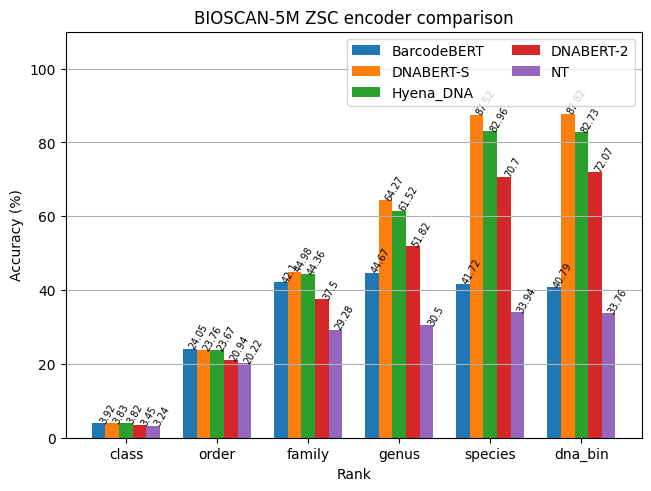

In [20]:
%matplotlib inline
import os
import pickle
import cProfile
import pstats
import warnings

import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy.spatial import distance
from matplotlib import pyplot as plt
from obj_knn import FinBOL_GBOL
from tqdm import tqdm

warnings.filterwarnings("ignore")

dataset = "BIOSCAN-5M"
#data_folder = "BIOSCAN_5M_DNA_experiments/data"

import json

with open(f"results_{dataset}_ZSC_true_GAP.json", "r") as f:
    results = json.load(f)

rank_list = ["class", "order", "family", "genus", "species", "dna_bin"]
encoders = ["BarcodeBERT", "DNABERT-2", "DNABERT-S", "Hyena_DNA", "NT"]#, "DNABERT"]

x = np.arange(len(rank_list))  # the label locations
encoders = sorted(encoders,key=lambda x:results[x]['class']['test_seen + unseen']['AMI'],reverse=True)
width = 0.15  # the width of the bars
multiplier = -1

graph = {}
for encoder in encoders:
    graph[encoder] = [round(results[encoder][rank]['test_seen + unseen']['AMI'], 2) for rank in rank_list]

fig, ax = plt.subplots(layout='constrained')

for rank, measurement in graph.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=rank)
    multiplier += 1

for i in range(len(x)):
    for j, encoder in enumerate(encoders):
        plt.text(i+offset+(j-multiplier)*(width)+0.1, graph[encoder][i], graph[encoder][i], ha='center', rotation=60, fontsize='x-small')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Rank')

ax.set_title('BIOSCAN-5M ZSC encoder comparison')
ax.set_xticks(x + width, rank_list)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 110)
plt.grid(axis="y")

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


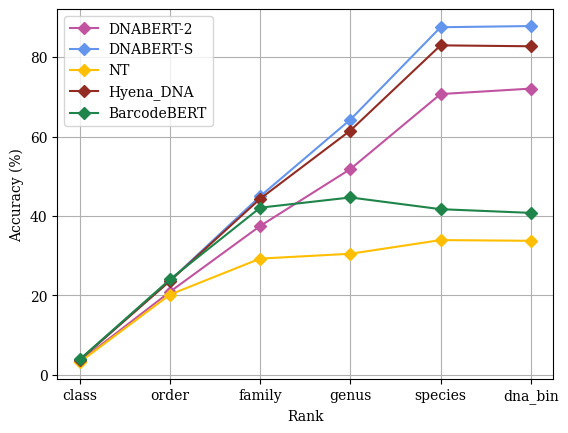

In [22]:
import matplotlib.pyplot as plt
import json


plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#C154A0", "#6495ED", "#FFBF00", "#922B21", "#1E8449", "#40E0D0", "#C18420"])


encoders = ["DNABERT-2", "DNABERT-S", "NT", "Hyena_DNA",  "BarcodeBERT"] #, "BarcodeBERT-5M"]

for encoder in encoders:
    plt.plot(rank_list, graph[encoder],"D-", label = encoder)
#plt.title('1NN-probing at different taxonomic levels')
plt.xlabel('Rank')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.savefig("BIOSCAN_5M_KNN_by_rank_cosine.eps", dpi=150)
plt.savefig("BIOSCAN_5M_KNN_by_rank_cosine.jpg", dpi=150)
plt.show()

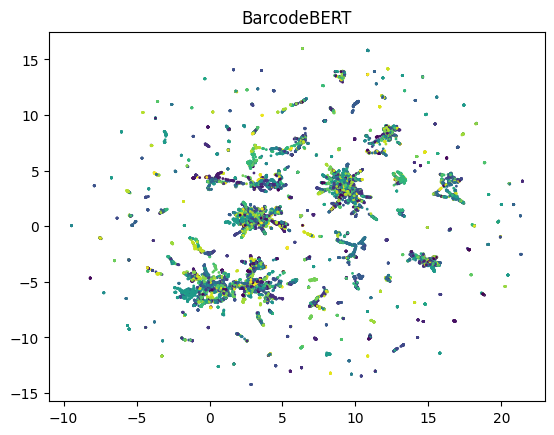

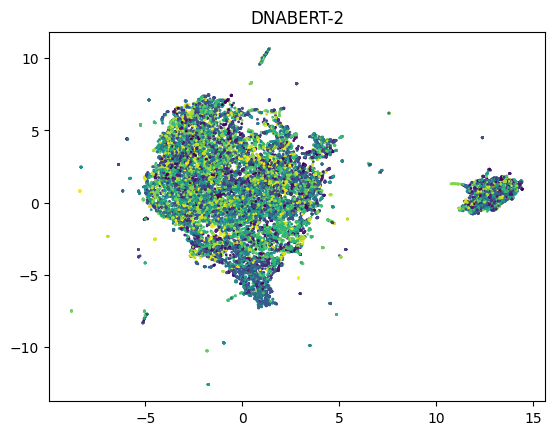

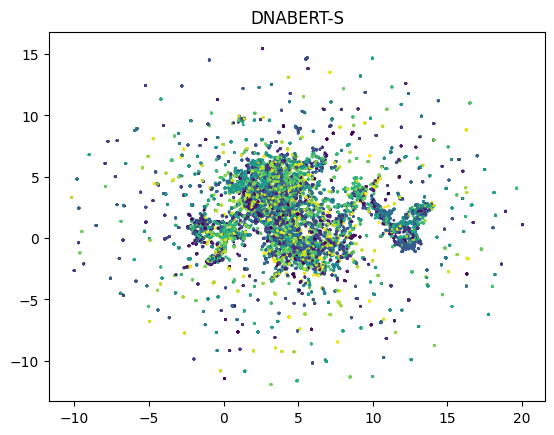

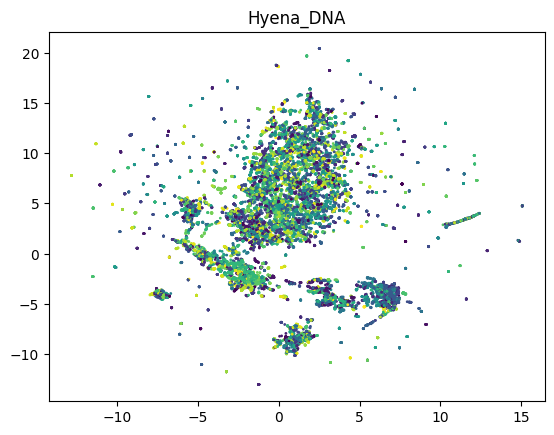

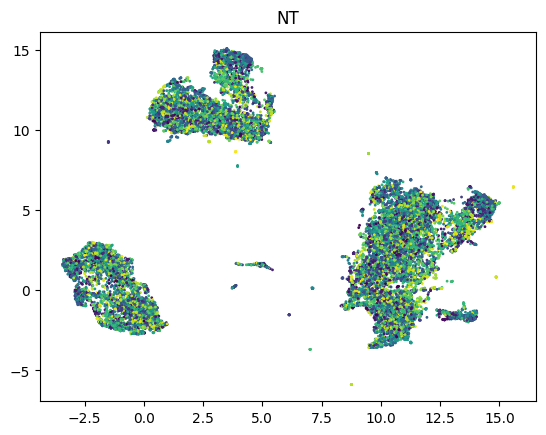

In [10]:
# dictionaries for storing results and knn probability data
results = {}
label_probs = {}

for encoder in encoders:
    results[encoder] = {}

    rank = 'genus'
       
    partition_name = "test_seen + unseen"
    X_part = np.vstack([embeddings[encoder]['Seen']['data'], embeddings[encoder]['Unseen']['data']])
    y_part = np.hstack([embeddings[encoder]['Seen'][rank], embeddings[encoder]['Unseen'][rank]])

    # creating a number mapping for the labels at the current taxonomic rank to use for the analysis
    all_labels = sorted(list(set(embeddings[encoder]['Unseen'][rank]+embeddings[encoder]['Seen'][rank])))
    y_true = np.array([all_labels.index(el) for el in y_part])

    # Step 1: Dimensionality reduction with UMAP to 50 dimensions
    umap_reducer = umap.UMAP(n_components=2, random_state=42)
    X_reduced = umap_reducer.fit_transform(X_part)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_true, s=1)
    plt.title(f"{encoder}")
    plt.show()